In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### Feature Engineering

In [2]:
# read raw data
df=pd.read_csv('Cleaned_2018_Flights.csv')
df = df.iloc[:,1:]
df

,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,20181767585,2018176758501,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,20181767586,2018176758601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,20181767587,2018176758701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,20181767636,2018176763601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,20181767637,2018176763701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9534412,201844999082,20184499908202,1,4,STL,64,AUS,74,721.0,2,1.0,WN,310.10
9534413,201844999092,20184499909203,1,4,BNA,54,MCI,64,491.0,2,1.0,WN,106.17
9534414,201844999112,20184499911203,1,4,BOS,13,LIT,71,1260.0,2,1.0,WN,161.19
9534415,201844999113,20184499911303,1,4,BOS,13,LIT,71,1260.0,2,1.0,WN,170.87


In [3]:
# raw data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9534417 entries, 0 to 9534416
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ItinID             int64  
 1   MktID              int64  
 2   MktCoupons         int64  
 3   Quarter            int64  
 4   Origin             object 
 5   OriginWac          int64  
 6   Dest               object 
 7   DestWac            int64  
 8   Miles              float64
 9   ContiguousUSA      int64  
 10  NumTicketsOrdered  float64
 11  AirlineCompany     object 
 12  PricePerTicket     float64
dtypes: float64(3), int64(7), object(3)
memory usage: 945.6+ MB


In [4]:
# check null values
df.isnull().sum()

ItinID               0
MktID                0
MktCoupons           0
Quarter              0
Origin               0
OriginWac            0
Dest                 0
DestWac              0
Miles                0
ContiguousUSA        0
NumTicketsOrdered    0
AirlineCompany       0
PricePerTicket       0
dtype: int64

In [5]:
# take a random sample of 10000 observations
df_s = df.sample(n=10000, random_state=0).reset_index(drop=True)
# drop unneeded features
df_s = df_s.drop(columns=['ItinID','MktID','MktCoupons','Origin','Dest','ContiguousUSA'])

In [6]:
# encode categorical variables
territory_code = {int(i.split(' ')[0]):' '.join(i.split(' ')[1:]) for i in list(pd.read_csv('territory_code.csv',header=None)[0])}
airline_code = {i.split(' -- ')[0]:i.split(' -- ')[1] for i in list(pd.read_csv('airline_code.csv',header=None)[0])}
df_s['OriginState'] = [territory_code[i] for i in list(df_s['OriginWac'])]
df_s['DestState'] = [territory_code[i] for i in list(df_s['DestWac'])]
df_s = df_s.drop(columns=['OriginWac','DestWac'])

In [7]:
# convert categorical variables to dummy
quarter = pd.get_dummies(df_s['Quarter'],drop_first=True)
quarter.columns=['Q2','Q3','Q4']

airline = pd.get_dummies(df_s['AirlineCompany'],drop_first=True)

ogState = pd.get_dummies(df_s['OriginState'],sparse=True)
ogState.columns = ['o'+i for i in list(ogState.columns)]

destState = pd.get_dummies(df_s['DestState'],sparse=True)
destState.columns = ['d'+i for i in list(destState.columns)]

df_s = pd.concat([df_s, quarter,airline,ogState,destState],axis=1).drop(columns=['Quarter','AirlineCompany',
                                                                                 'OriginState','DestState'])


In [8]:
df_s.head()

,Miles,NumTicketsOrdered,PricePerTicket,Q2,Q3,Q4,AS,B6,DL,F9,...,dTennessee,dTexas,dU.S. Pacific Trust Territories and Possessions,dU.S. Virgin Islands,dUtah,dVermont,dVirginia,dWashington,dWisconsin,dWyoming
0,950.0,15.0,80.00,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,606.0,1.0,387.00,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,554.0,1.0,266.32,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,733.0,1.0,101.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2640.0,1.0,240.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# check scale of continuous variables
numerical = ['NumTicketsOrdered','PricePerTicket','Miles']
df_s[numerical].describe()

,NumTicketsOrdered,PricePerTicket,Miles
count,10000.000000,10000.000000,10000.000000
mean,2.431700,232.049281,1193.984700
std,2.920135,142.271539,696.715875
min,1.000000,50.000000,68.000000
25%,1.000000,133.000000,666.000000
50%,1.000000,197.500000,1024.000000
75%,2.000000,290.297500,1605.000000
max,20.000000,998.000000,4983.000000


<AxesSubplot:xlabel='PricePerTicket', ylabel='Density'>

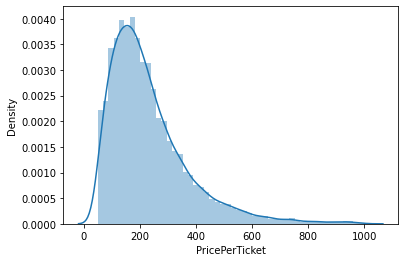

In [10]:
# check distribution of numerical variables
sns.distplot(df_s.PricePerTicket, kde = True) # right skewed

<AxesSubplot:xlabel='PricePerTicket', ylabel='Density'>

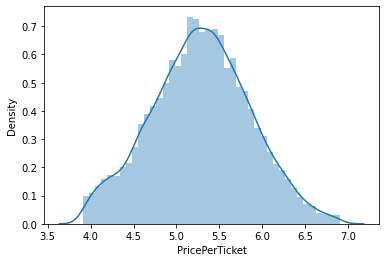

In [11]:
sns.distplot(np.log(df_s.PricePerTicket), kde = True) # take log scale

<AxesSubplot:xlabel='Miles', ylabel='Density'>

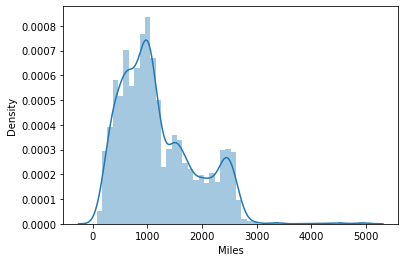

In [12]:
sns.distplot(df_s.Miles, kde = True) # right skewed

<AxesSubplot:xlabel='Miles', ylabel='Density'>

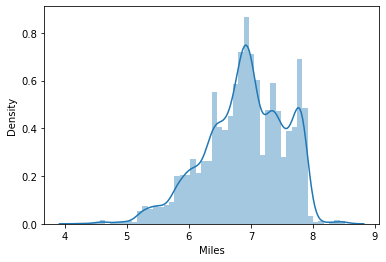

In [13]:
sns.distplot(np.log(df_s.Miles), kde = True) # take log scale

In [14]:
# convert numerical features to log_scale
df_s['log_miles']=np.log(df_s.Miles)
df_s['log_price']=np.log(df_s.PricePerTicket)
df_cleaned = df_s.drop(columns=['Miles','PricePerTicket'])
df_cleaned[['log_miles','log_price','NumTicketsOrdered']].describe()

,log_miles,log_price,NumTicketsOrdered
count,10000.000000,10000.000000,10000.000000
mean,6.900233,5.281350,2.431700
std,0.641801,0.576921,2.920135
min,4.219508,3.912023,1.000000
25%,6.501290,4.890349,1.000000
50%,6.931472,5.285739,1.000000
75%,7.380879,5.670906,2.000000
max,8.513787,6.905753,20.000000


In [15]:
df_cleaned.head()

,NumTicketsOrdered,Q2,Q3,Q4,AS,B6,DL,F9,G4,HA,...,dU.S. Pacific Trust Territories and Possessions,dU.S. Virgin Islands,dUtah,dVermont,dVirginia,dWashington,dWisconsin,dWyoming,log_miles,log_price
0,15.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.856462,4.382027
1,1.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.406880,5.958425
2,1.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.317165,5.584699
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.597146,4.615121
4,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.878534,5.480639


In [16]:
df_cleaned

,NumTicketsOrdered,Q2,Q3,Q4,AS,B6,DL,F9,G4,HA,...,dU.S. Pacific Trust Territories and Possessions,dU.S. Virgin Islands,dUtah,dVermont,dVirginia,dWashington,dWisconsin,dWyoming,log_miles,log_price
0,15.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.856462,4.382027
1,1.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.406880,5.958425
2,1.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.317165,5.584699
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.597146,4.615121
4,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.878534,5.480639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.898715,4.912655
9996,5.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,7.478735,5.187386
9997,2.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7.508787,5.030438
9998,2.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.617403,5.616771


In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso,LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
# split into X and y variables

X = df_cleaned.drop(columns=['log_price'])
y = df_cleaned['log_price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Model Selection

Ideally, we should tune hyperparameters of each model through cross validation before the final model selection based on the hold-out set. 

For the sake of time and goal of this project, we skip this step, but want to make a note here to acknowledge the importance of the step.

#### 1. Linear Regression
- After doing tuning the degree of features, we found out that simple linear regression yields the lowest cv error.

In [19]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
print("Training R-squared: ", lm.score(X_train,y_train))
print("Testing R-squared: ", lm.score(X_test,y_test))
MSE_train = mean_squared_error(y_train,model.predict(X_train))
MSE_test = mean_squared_error(y_test,model.predict(X_test))
print("Training MSE: ", MSE_train)
print("Testing MSE: ", MSE_test)

Training R-squared:  0.3486458197134017
Testing R-squared:  0.30669498291748964
Training MSE:  0.21603736927012276
Testing MSE:  0.2338315434506301


#### 2. Lasso Regression
- Since we have too many dummy variables, which means the dataset is sparse, we would like to use Lasso Regression to only include the most relevant features.

In [20]:
# use cross validation to find the best alpha
model_lassoCV= LassoCV(cv=10).fit(X_train,y_train)

best_alpha = model_lassoCV.alpha_
print("Lasso - best alpha: "+str(best_alpha))

Lasso - best alpha: 0.0003345688958906152


In [21]:
# refit Lasso Regression with paramter tuned
lasso = Lasso(alpha = best_alpha).fit(X_train,y_train)

lasso.fit(X_train, y_train)

print("Training R-squared: ", lasso.score(X_train,y_train))
print("Testing R-squared: ", lasso.score(X_test,y_test))
print("Training MSE: ", mean_squared_error(y_train, lasso.predict(X_train)))
print("Testing MSE: ", mean_squared_error(y_test, lasso.predict(X_test)))

Training R-squared:  0.3428089276872708
Testing R-squared:  0.32011513877354414
Training MSE:  0.21797331569712544
Testing MSE:  0.22930531663869316


#### 3. Decision Tree
- The result is undesirable because tree-based models are not good candidates to trian sparse datase since many 0 values may be selected when spliting the nodes, resulting in high error rates.

In [22]:
# Simple Decision Tree
decision_tree1 = DecisionTreeRegressor(max_leaf_nodes=10)
decision_tree1 = decision_tree1.fit(X_train, y_train)
mean_cv1 = abs(cross_val_score(decision_tree1, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()

In [23]:
print("Mean CV score: ", mean_cv1)
print("Training R-squared: ",decision_tree1.score(X_train,y_train))
print("Testing R-squared: ",decision_tree1.score(X_test,y_test))
print("Training MSE: ",mean_squared_error(y_train,decision_tree1.predict(X_train)))
print("Testing MSE: ", mean_squared_error(y_test,decision_tree1.predict(X_test)))

Mean CV score:  0.23812675868688277
Training R-squared:  0.2861149461737469
Testing R-squared:  0.2829220309268551
Training MSE:  0.23677724601694236
Testing MSE:  0.2418494661821574


#### 4. Random Forest
- The result is undesirable because tree-based models are not good candidates to trian sparse datase since many 0 values may be selected when spliting the nodes, resulting in high error rates.

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [25]:
print("Training R-squared: ", rf.score(X_train, y_train))
print("Testing R-squared: ", rf.score(X_test, y_test))

MSE_rf_train = mean_squared_error(y_train,rf.predict(X_train))
MSE_rf_test = mean_squared_error(y_test,rf.predict(X_test))
print("Training MSE: ",MSE_rf_train)
print("Testing MSE: ", MSE_rf_test)

Training R-squared:  0.8507542285016623
Testing R-squared:  0.2370203717493511
Training MSE:  0.04950097017110391
Testing MSE:  0.25733075587134363


#### 5. Gradient Boosting Regressor
- Despite being a tree model, Gradient Boosting Regressor takes good care of weak predictors, which is exactly the case in our prediction task. This ensemble method also helps reduces bias, helping reach a more accurate prediction in spite of the inherently low R2.

In [26]:
# create gradient boosting classifier object
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print("Training R-squared: ",gb.score(X_train,y_train))
print("Testing R-squared: ",gb.score(X_test, y_test))
print("Training MSE: ", mean_squared_error(y_train, gb.predict(X_train)))
print("Testing MSE: ", mean_squared_error(y_test, gb.predict(X_test)))

Training R-squared:  0.37553476995462043
Testing R-squared:  0.3336456948711054
Training MSE:  0.20711899851522542
Testing MSE:  0.22474185504807623


#### By comparing the above models, we decided to use GradientBoostingRegressor and construct prediction interval
- Given the low R-squared, instead of giving a single predicted value, we would like format our prediction in a range (80% predion interval) to capture the uncertainty, especially in time-related features.

In [27]:
# construct three gradientboosting models capturing the 80% interval with the median value
all_models = []
for alpha in [0.1,0.9]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha)
    all_models.append(gbr.fit(X_train, y_train))

In [28]:
all_models.append(gb.fit(X_train,y_train))

In [29]:
import pickle
pickle.dump(all_models, open('all_models.sav','wb'))

In [30]:
predictions = pd.DataFrame(y_test)
predictions['lower'] = all_models[0].predict(X_test)
predictions['mid'] = all_models[2].predict(X_test)
predictions['upper'] = all_models[1].predict(X_test)

In [31]:
df_n = predictions.apply(lambda x: np.exp(x))
df_n

,log_price,lower,mid,upper
9394,145.50,100.940959,159.362805,308.412153
898,211.00,109.165991,227.620043,409.330695
2398,629.50,158.257447,311.048590,577.134235
5906,269.00,162.304176,311.272906,578.352901
2343,124.50,100.546937,162.910061,306.674831
...,...,...,...,...
1037,190.50,155.886578,275.031064,476.092192
2899,139.50,67.871319,109.884155,187.571541
9549,68.85,85.818021,145.751220,267.713249
2740,93.00,63.738734,99.618470,180.255969


In [32]:
X_train.to_csv('X_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)

### Feature Importance & Model Interpretability

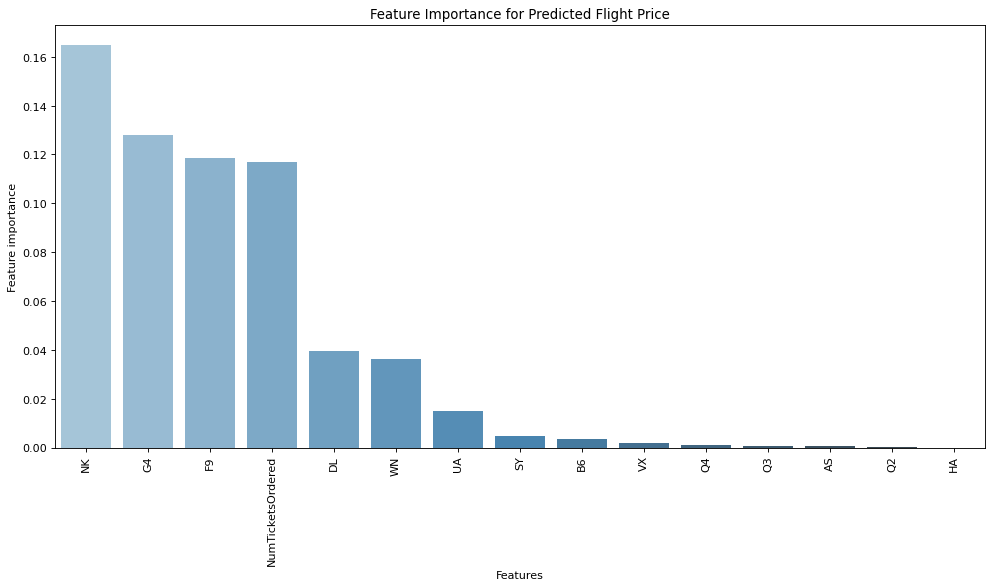

In [33]:
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
forest_importances = pd.DataFrame({ 'features': X.columns, 'importances':gb.feature_importances_ })[:15]
sns.barplot(x="features",y="importances" ,data=forest_importances, 
            order=forest_importances.sort_values('importances',ascending = False).features, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Feature Importance for Predicted Flight Price")
plt.ylabel("Feature importance")
plt.xlabel("Features")
plt.show()

In [34]:
import shap

In [35]:
explainer = shap.Explainer(gb,X_train)
shap_values = explainer(X_train)

 99%|===================| 7899/8000 [00:13<00:00]        

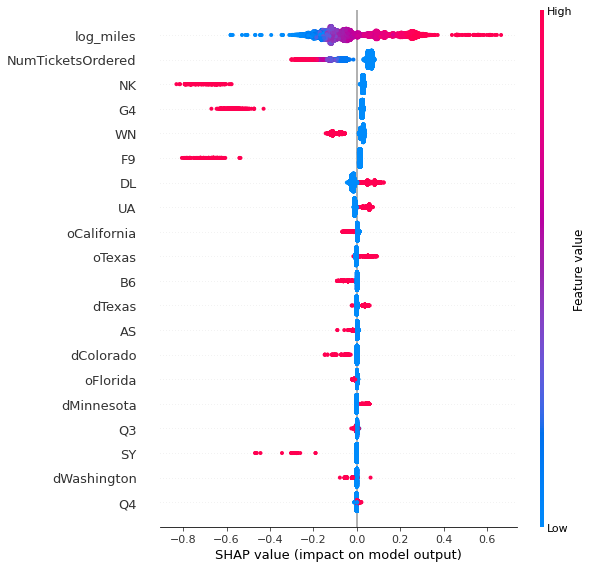

In [36]:
shap.summary_plot(shap_values, np.array(X_train), feature_names = X_train.columns)

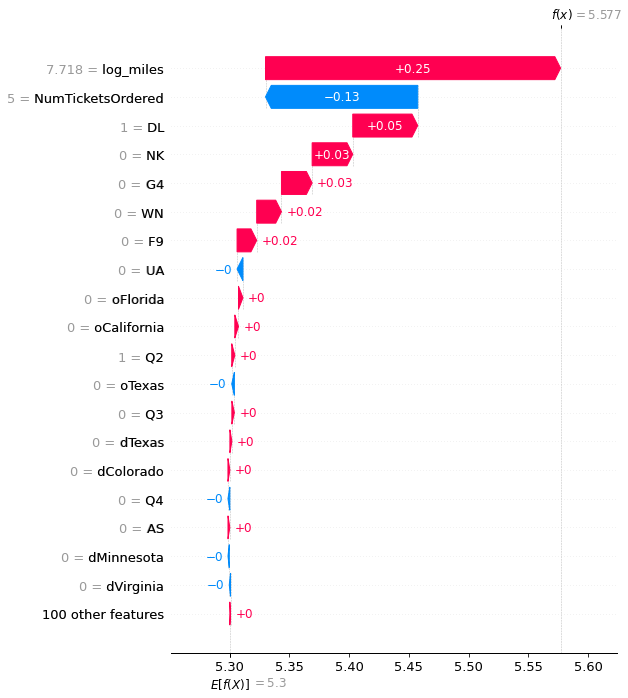

In [37]:
idx = 11
shap_object = shap.Explanation(base_values = shap_values[idx][0].base_values,
values = shap_values[idx].values,
feature_names = X_train.columns,
data = shap_values[idx].data)

shap.plots.waterfall(shap_object,max_display=20)